In [2]:
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import extract
import Neural_net as nn
import numpy as np

In [3]:
coord_xyz, ene, forces = extract.load_data("/Users/walfits/Documents/aspirin/", n_samples=10000)
mean_ene = np.mean(ene)
std_ene = np.std(ene)

ene = (ene-mean_ene)/std_ene
forces = forces/std_ene
# Concatenate to it on blue crystal
data = np.concatenate((coord_xyz, forces, np.reshape(ene, (ene.shape[0],1))), axis = 1)
print(data.shape)
np.savetxt('data.csv', data, delimiter=',', newline='\n')

(10000, 127)


In [14]:
print(coord_xyz.shape, ene.shape, forces.shape)

(50, 63) (50,) (50, 63)


In [15]:
estimator = nn.MLPRegFlow()
estimator = nn.MLPRegFlow(max_iter=50000, learning_rate_init=0.005, hidden_layer_sizes=(80,), batch_size=50, alpha_reg=0, alpha_force=0.1, alpha_grad=0.0)

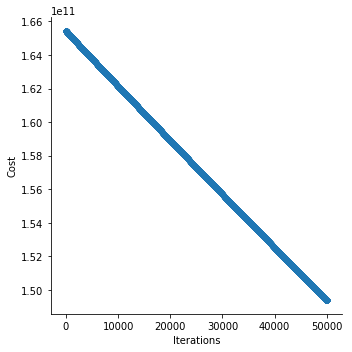

In [16]:
estimator.fit(coord_xyz, ene, forces)
estimator.plot_cost()

In [6]:
ene_pred, force_pred = estimator.predict(coord_xyz[:100])

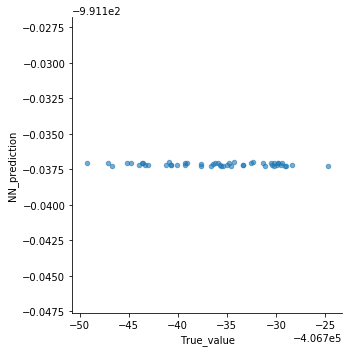

In [7]:
estimator.correlation_plot(ene_pred, ene[:100])